In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn import linear_model
#importing libraries

# Loading the data

In [3]:
df=pd.read_excel('C:\\Users\\Siddharth Nahar\\PythonSem2\\Final Year Project\\21100172.xlsx')
df.head()
#reading excel file

,REF_DATE,GEO,DGUID,North American Industry Classification System (NAICS),Summary statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2012,Canada,2016A000011124,Food services and drinking places [722],Operating revenue,Dollars,81,millions,6,v99848503,1.1.1,54770.2,NaN,NaN,NaN,1
1,2012,Canada,2016A000011124,Food services and drinking places [722],Operating expenses,Dollars,81,millions,6,v99848504,1.1.2,52462.4,NaN,NaN,NaN,1
2,2012,Canada,2016A000011124,Food services and drinking places [722],"Salaries, wages, commissions and benefits",Dollars,81,millions,6,v99848505,1.1.3,17616.9,NaN,NaN,NaN,1
3,2012,Canada,2016A000011124,Full-service restaurants [722511],Operating revenue,Dollars,81,millions,6,v99848507,1.2.1,23426.3,NaN,NaN,NaN,1
4,2012,Canada,2016A000011124,Full-service restaurants [722511],Operating expenses,Dollars,81,millions,6,v99848508,1.2.2,22768.0,NaN,NaN,NaN,1


Knowing the data

In [4]:
df.describe()

,REF_DATE,UOM_ID,SCALAR_ID,VALUE,SYMBOL,TERMINATED,DECIMALS
count,2310.000000,2310.0,2310.0,2102.000000,0.0,0.0,2310.0
mean,2017.000000,81.0,6.0,3199.935775,NaN,NaN,1.0
std,3.162962,0.0,0.0,8603.813094,NaN,NaN,0.0
min,2012.000000,81.0,6.0,0.200000,NaN,NaN,1.0
25%,2014.000000,81.0,6.0,59.550000,NaN,NaN,1.0
50%,2017.000000,81.0,6.0,393.450000,NaN,NaN,1.0
75%,2020.000000,81.0,6.0,1914.875000,NaN,NaN,1.0
max,2022.000000,81.0,6.0,84249.700000,NaN,NaN,1.0


# Data wrangling

Removed Irrelevant Columns

In [5]:
columns_to_drop = ['UOM_ID', 'SCALAR_ID', 'STATUS','SYMBOL','TERMINATED','DECIMALS']
df.drop(columns_to_drop, axis=1, inplace=True)

In [6]:
columns_to_drop = ['VECTOR', 'COORDINATE', 'DGUID','UOM','SCALAR_FACTOR']
df.drop(columns_to_drop, axis=1, inplace=True)

In [7]:
df

,REF_DATE,GEO,North American Industry Classification System (NAICS),Summary statistics,VALUE
0,2012,Canada,Food services and drinking places [722],Operating revenue,54770.2
1,2012,Canada,Food services and drinking places [722],Operating expenses,52462.4
2,2012,Canada,Food services and drinking places [722],"Salaries, wages, commissions and benefits",17616.9
3,2012,Canada,Full-service restaurants [722511],Operating revenue,23426.3
4,2012,Canada,Full-service restaurants [722511],Operating expenses,22768.0
...,...,...,...,...,...
2305,2022,Nunavut,Special food services [7223],Operating expenses,NaN
2306,2022,Nunavut,Special food services [7223],"Salaries, wages, commissions and benefits",NaN
2307,2022,Nunavut,Drinking places (alcoholic beverages) [7224],Operating revenue,NaN
2308,2022,Nunavut,Drinking places (alcoholic beverages) [7224],Operating expenses,NaN


Renaming the columns and giving them relevant names

In [8]:
df.rename(columns={'North American Industry Classification System (NAICS)': 'Type Of Business', 'Summary statistics': 'Financial Metrics'}, inplace=True)

In [9]:
df.rename(columns={'GEO': 'Location'}, inplace=True)

In [10]:
df.rename(columns={'REF_DATE': 'Year'}, inplace=True)

In [11]:
df.info()
#Getting inoformation about the columns to know the datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               2310 non-null   int64  
 1   Location           2310 non-null   object 
 2   Type Of Business   2310 non-null   object 
 3   Financial Metrics  2310 non-null   object 
 4   VALUE              2102 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 90.4+ KB


<Axes: >

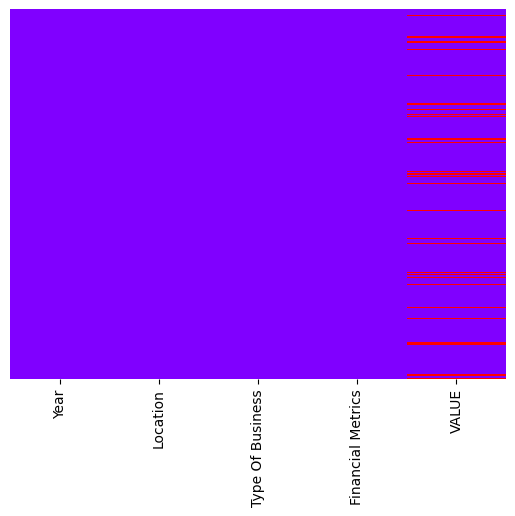

In [12]:
sns.heatmap(data=df.isnull(),yticklabels=False,cbar=False,cmap='rainbow')
#Getting to know the which columns has missing values

In [13]:
df = df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2102 entries, 0 to 2303
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               2102 non-null   int64  
 1   Location           2102 non-null   object 
 2   Type Of Business   2102 non-null   object 
 3   Financial Metrics  2102 non-null   object 
 4   VALUE              2102 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 98.5+ KB


In [15]:
df.isnull().sum()

Year                 0
Location             0
Type Of Business     0
Financial Metrics    0
VALUE                0
dtype: int64

In [16]:
df

,Year,Location,Type Of Business,Financial Metrics,VALUE
0,2012,Canada,Food services and drinking places [722],Operating revenue,54770.2
1,2012,Canada,Food services and drinking places [722],Operating expenses,52462.4
2,2012,Canada,Food services and drinking places [722],"Salaries, wages, commissions and benefits",17616.9
3,2012,Canada,Full-service restaurants [722511],Operating revenue,23426.3
4,2012,Canada,Full-service restaurants [722511],Operating expenses,22768.0
...,...,...,...,...,...
2296,2022,Nunavut,Food services and drinking places [722],Operating expenses,15.8
2297,2022,Nunavut,Food services and drinking places [722],"Salaries, wages, commissions and benefits",4.7
2301,2022,Nunavut,Limited-service eating places [722512],Operating revenue,16.9
2302,2022,Nunavut,Limited-service eating places [722512],Operating expenses,14.0


## Exploratory Data Analysis

<Axes: xlabel='VALUE', ylabel='Type Of Business'>

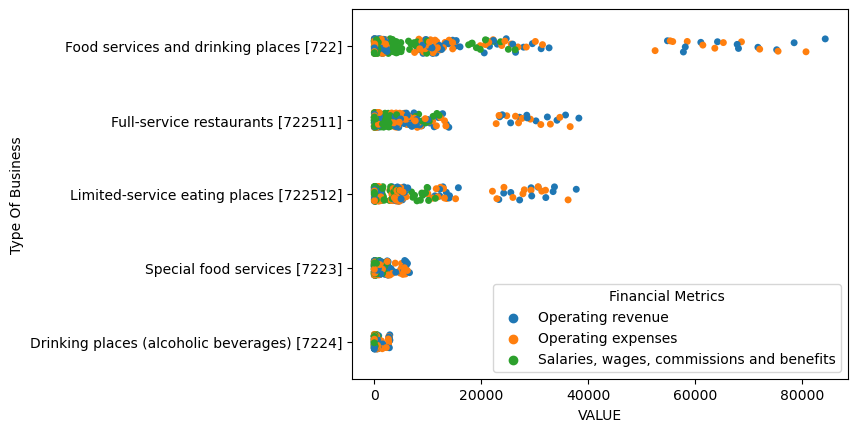

In [17]:
sns.stripplot(x="VALUE", y="Type Of Business",data=df,
              hue="Financial Metrics")

<Axes: xlabel='VALUE', ylabel='Location'>

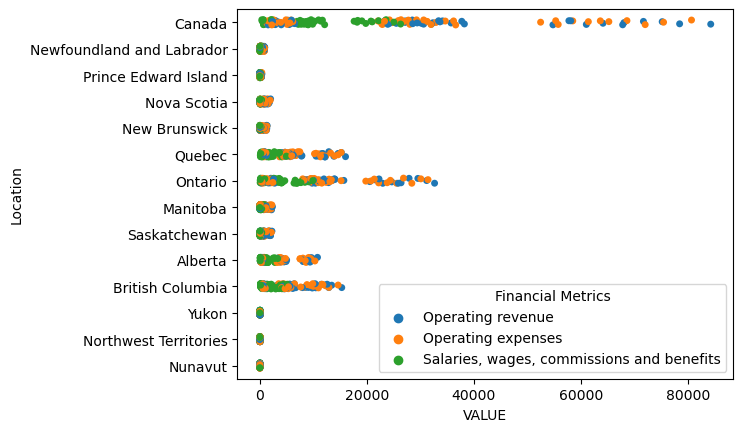

In [18]:
sns.stripplot(x="VALUE", y="Location",data=df,hue="Financial Metrics")

## Converting Categorical Values to Numerical using Label encoding

In [19]:
df['Financial Metrics'].replace(['Operating expenses', 
                                 'Salaries, wages, commissions and benefits',
                                 'Operating revenue',
                                 'Operating profit margin'],
                        [0,1,2,3], inplace=True)

C:\Users\Siddharth Nahar\AppData\Local\Temp\ipykernel_23392\88111841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Financial Metrics'].replace(['Operating expenses',


In [20]:
df['Type Of Business'].replace(['Special food services [7223]', 
                                'Drinking places (alcoholic beverages) [7224]',
                                'Full-service restaurants [722511]',
                                'Limited-service eating places [722512]',
                                'Food services and drinking places [722]'],
                        [0,1,2,3,4], inplace=True)

C:\Users\Siddharth Nahar\AppData\Local\Temp\ipykernel_23392\4116288359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type Of Business'].replace(['Special food services [7223]',


In [21]:
df['Location'].replace(['Canada',
                   'Newfoundland and Labrador',
                  'Prince Edward Island',
                  'Nova Scotia',
                  'New Brunswick',
                  'Quebec',
                  'Ontario',
                  'Manitoba',
                  'Saskatchewan',
                  'Alberta',
                  'British Columbia',
                  'Northwest Territories',
                  'Nunavut',
                  'Yukon'],
                  [0,1,2,3,4,5,6,7,8,9,10,11,12,13], inplace=True)

C:\Users\Siddharth Nahar\AppData\Local\Temp\ipykernel_23392\2354802066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'].replace(['Canada',


In [22]:
df

,Year,Location,Type Of Business,Financial Metrics,VALUE
0,2012,0,4,2,54770.2
1,2012,0,4,0,52462.4
2,2012,0,4,1,17616.9
3,2012,0,2,2,23426.3
4,2012,0,2,0,22768.0
...,...,...,...,...,...
2296,2022,12,4,0,15.8
2297,2022,12,4,1,4.7
2301,2022,12,3,2,16.9
2302,2022,12,3,0,14.0


# Machine Learning Model

In [23]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
#importing Linear regression

In [52]:
#Separating target and input features
X=df[['Year','Location','Type Of Business','Financial Metrics']]
y=df[['VALUE']]

In [55]:
#Splitting training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=2)

In [56]:
#Importing linear model for linear Regression
from sklearn import linear_model
lm = linear_model.LinearRegression()

In [57]:
lm.fit(X_train,y_train)

LinearRegression()

In [58]:
#Predicting all values of test data 
predictions=lm.predict(X_test)

Text(0, 0.5, 'predictions')

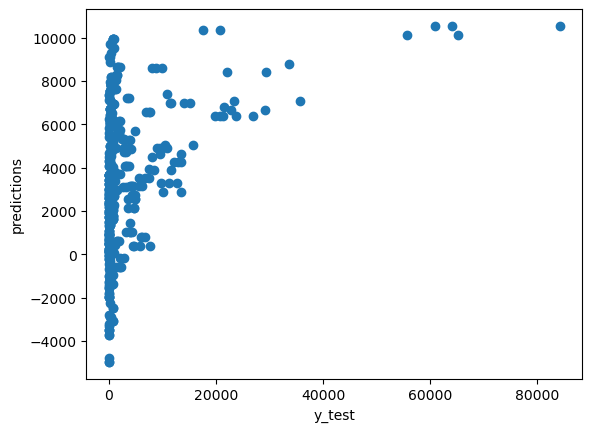

In [59]:
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')

In [60]:
#Error for the model
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4399.217671120495
MSE: 65558415.11475708
RMSE: 8096.81512168563


C:\Users\Siddharth Nahar\AppData\Local\Temp\ipykernel_23392\3134398722.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions,bins=30);


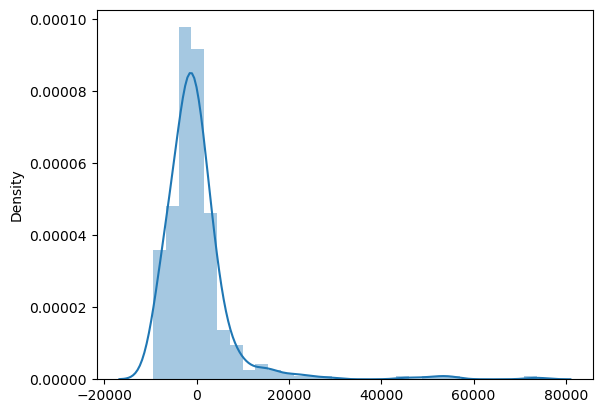

In [31]:
sns.distplot(y_test-predictions,bins=30);

In [61]:
#Predicting the value by proving random values
lm.predict([[0,4,2]])

C:\Users\Siddharth Nahar\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[10544.1428467]])

Pickle file generation for Model Deployment

In [62]:

import pickle

filename = 'foodandRestaurantLinearRegression.pkl'

# Save model (serialize)
pickle.dump(lm, open(filename, 'wb'))

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [61]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train_scaled, y_train)

C:\Users\Siddharth Nahar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [62]:
predictions_SVR = regressor.predict(X_test)

C:\Users\Siddharth Nahar\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [66]:
X_pred_scaled = scaler.transform([[12,5,5]])

# Make prediction
prediction = regressor.predict(X_pred_scaled)
prediction

C:\Users\Siddharth Nahar\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([403.17750854])

In [67]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_SVR))
print('MSE:', metrics.mean_squared_error(y_test, predictions_SVR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_SVR)))

MAE: 3186.136257995174
MSE: 84423801.11656731
RMSE: 9188.242547765449


Text(0, 0.5, 'predictions')

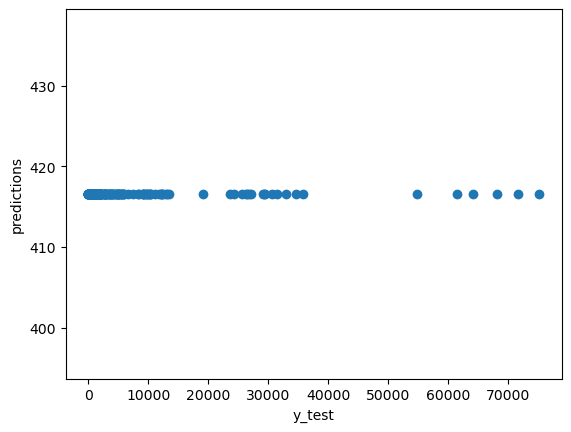

In [37]:
plt.scatter(y_test,predictions_SVR)
plt.xlabel('y_test')
plt.ylabel('predictions')

In [38]:
regressor.predict([[2022,12,3,1]])

array([416.58006257])

In [51]:
import pickle

filename = 'foodandRestaurantRegressor.pkl'

# Save model (serialize)
pickle.dump(regressor, open(filename, 'wb'))

In [35]:
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
dtree = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
dtree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [36]:
predictions_dtree = dtree.predict(X_test)

In [37]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_dtree))
print('MSE:', metrics.mean_squared_error(y_test, predictions_dtree))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_dtree)))

MAE: 453.37674640877736
MSE: 2191740.058299207
RMSE: 1480.4526531771312


In [38]:
dtree.predict([[0,4,2]])

C:\Users\Siddharth Nahar\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([66468.175])

In [40]:
import pickle

filename = 'decisionTreeFoodPrediction.pkl'

# Save model (serialize)
pickle.dump(dtree, open(filename, 'wb'))

In [42]:
list_pickle_path = 'decisionTreeFoodPrediction.pkl'
list_unpickle = open(list_pickle_path, 'rb')

# load the unpickle object into a variable
numbers_list = pickle.load(list_unpickle)

numbers_list.predict([[0,4,2]])

C:\Users\Siddharth Nahar\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([66468.175])